In [1]:
import re
import requests
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, MaxNLocator
from matplotlib.colors import Normalize, PowerNorm
%matplotlib inline

In [2]:
url = f'https://www.parkrun.ru/results/largestclubs/'
page_all_results = requests.get(url, headers={'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:86.0) Gecko/20100101 Firefox/86.0'})

In [3]:
data = pd.read_html(page_all_results.text)[0]

In [4]:
data

,Клуб,Unnamed: 1,Число участников,Число пробежек,Сайт
0,Бег с удовольствием,NaN,858,2437,Бег с удовольствием home page
1,adidas runners,NaN,622,6851,adidas runners home page
2,I Love Running,NaN,610,1669,I Love Running home page
3,Nike+ Running Club Moscow,NaN,236,689,Nike+ Running Club Moscow home page
4,Wake&Run,NaN,187,5895,Wake&Run home page
5,NovgorodRun,NaN,160,1253,NovgorodRun home page
6,ТТЖТ,NaN,141,325,ТТЖТ home page
7,Orienta-Kuncevo,NaN,124,2554,Orienta-Kuncevo home page
8,Dmitry Erokhin Squad,NaN,110,1011,Dmitry Erokhin Squad home page
9,Сосновка,NaN,102,7390,Сосновка home page


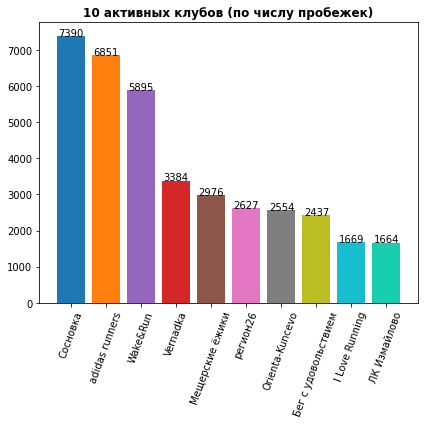

In [29]:
df = data.sort_values(by=[data.columns[3]], ascending=False).reset_index(drop=True).head(10)
clubs = df[data.columns[0]]
vals = df[data.columns[3]].values

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#17ceaf']
# ax.grid(False, axis='x')
# ax.yaxis.set_major_locator(MaxNLocator(2, 10, 50, 100, 200, 500))
plt.xticks(rotation=70)
plt.bar(clubs, height=vals, color=colors)
for p, label, mark in zip(ax.patches, vals, clubs.values):
    if mark == 'Wake&Run':
        p.set_facecolor('#9467bd')
    ax.annotate(label, (p.get_x()+0.05, p.get_height()+0.2))
plt.title('10 активных клубов (по числу пробежек)', fontweight='bold')
plt.tight_layout()